In [2]:
'''==================================
Time Series Analysis and Forecasting - Q02 - 20/Oct
=================================='''

# Q2. Consider the Ford stock price data from Yahoo Finance.

import pandas as pd

from pandas_datareader import data
start = pd.Timestamp('2017-1-1')
end = pd.Timestamp('2021-12-31')
f = data.DataReader("F", 'yahoo', start, end)

# 1. Is the variance of the trading volume relatively stable over time?
# 2. On how many days did the stock close higher than it opened?

In [3]:
f.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [4]:
f

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.600000,12.130000,12.200000,12.590000,40510800.0,9.985723
2017-01-04,13.270000,12.740000,12.770000,13.170000,77638100.0,10.445745
2017-01-05,13.220000,12.630000,13.210000,12.770000,75628400.0,10.128489
2017-01-06,12.840000,12.640000,12.800000,12.760000,40315900.0,10.120557
2017-01-09,12.860000,12.630000,12.790000,12.630000,39438400.0,10.017447
...,...,...,...,...,...,...
2021-12-27,20.889999,20.100000,20.260000,20.799999,59651800.0,20.353836
2021-12-28,21.059999,20.590000,20.660000,20.760000,53020500.0,20.314695
2021-12-29,20.770000,20.450001,20.709999,20.559999,37883000.0,20.118986


In [6]:
f_vol = f['Close']

f_vol.head()

Date
2017-01-03    12.59
2017-01-04    13.17
2017-01-05    12.77
2017-01-06    12.76
2017-01-09    12.63
Name: Close, dtype: float64

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

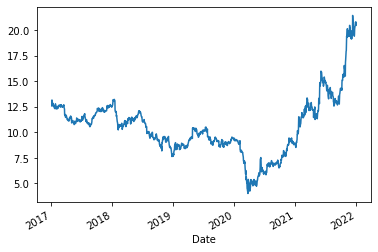

In [7]:
f_vol.plot()

In [7]:
dax_close_bms = dax_close.asfreq('BMS')

#### Given below is the closing price on the first business day of the month.

In [8]:
dax_close_bms

Date
2022-01-03    16020.730469
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-02    13939.070312
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-03    12209.480469
Freq: BMS, Name: Close, dtype: float64

In [9]:
dax_close_ms = dax_close.asfreq('MS')

In [10]:
dax_close_ms

Date
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01             NaN
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01             NaN
Freq: MS, Name: Close, dtype: float64

In [11]:
dax_close_ms_ffill = dax_close_ms.fillna(method="pad")


#### Given below is the closing price at the start of the month, along with filled from previous available values for non-working days

In [12]:
dax_close_ms_ffill

Date
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01    14446.480469
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01    12630.230469
Freq: MS, Name: Close, dtype: float64

#### References - 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

#### Alternate method by Sir

In [14]:
## Here we first need to get the data for all dates (re-index)
timeindex = pd.date_range("2022-01-01", "2022-10-18", freq="D")
s = DAX.reindex(timeindex)
s.ffill(inplace=True)                      #forward fill 
s.resample("MS").asfreq()['Close'] 

2022-01-01             NaN
2022-02-01    15619.389648
2022-03-01    13904.849609
2022-04-01    14446.480469
2022-05-01    14097.879883
2022-06-01    14340.469727
2022-07-01    12813.030273
2022-08-01    13479.629883
2022-09-01    12630.230469
2022-10-01    12114.360352
Freq: MS, Name: Close, dtype: float64